Distribuição de energia otimizada:
- U2 fornece 80 para R3
- U2 fornece 70 para R2
- U1 fornece 50 para R1


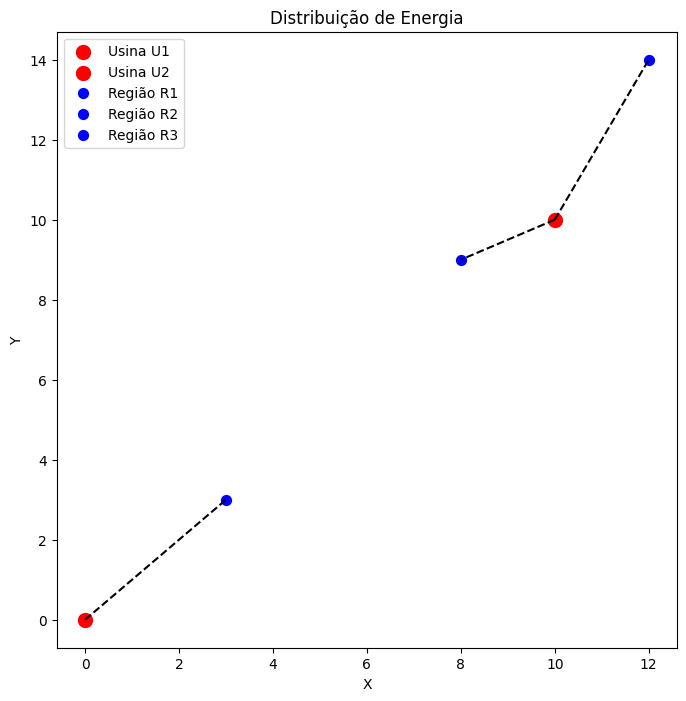

In [9]:
import heapq
import math
import matplotlib.pyplot as plt
import numpy as np

# DESAFIO 3: Otimização da Rede de Energia Inteligente

def distancia_euclidiana(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def distribuir_energia(usinas, regioes):
    alocacao = []
    regioes_nao_atendidas = []

    usinas_disponiveis = sorted(usinas, key=lambda u: u["capacidade"], reverse=True)
    regioes_demanda = sorted(regioes, key=lambda r: r["demanda"], reverse=True)

    for regiao in regioes_demanda:
        melhor_usina = None
        menor_distancia = float('inf')

        for usina in usinas_disponiveis:
            if usina["capacidade"] >= regiao["demanda"]:
                dist = distancia_euclidiana(usina["x"], usina["y"], regiao["x"], regiao["y"])
                if dist < menor_distancia:
                    menor_distancia = dist
                    melhor_usina = usina

        if melhor_usina:
            melhor_usina["capacidade"] -= regiao["demanda"]
            alocacao.append((melhor_usina["id"], regiao["id"], regiao["demanda"], melhor_usina["x"], melhor_usina["y"], regiao["x"], regiao["y"]))
        else:
            regioes_nao_atendidas.append(regiao["id"])

    return alocacao, regioes_nao_atendidas

def plotar_distribuicao_energia(alocacao, usinas, regioes):
    plt.figure(figsize=(8, 8))
    for usina in usinas:
        plt.scatter(usina["x"], usina["y"], color='red', s=100, label=f'Usina {usina["id"]}')
    for regiao in regioes:
        plt.scatter(regiao["x"], regiao["y"], color='blue', s=50, label=f'Região {regiao["id"]}')
    for con in alocacao:
        plt.plot([con[3], con[5]], [con[4], con[6]], 'k--')
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Distribuição de Energia")
    plt.show()

# Exemplo de entrada
usinas = [
    {"id": "U1", "x": 0, "y": 0, "capacidade": 100},
    {"id": "U2", "x": 10, "y": 10, "capacidade": 150}
]
regioes = [
    {"id": "R1", "x": 3, "y": 3, "demanda": 50},
    {"id": "R2", "x": 8, "y": 9, "demanda": 70},
    {"id": "R3", "x": 12, "y": 14, "demanda": 80}
]

resultado, faltantes = distribuir_energia(usinas, regioes)
print("Distribuição de energia otimizada:")
for r in resultado:
    print(f"- {r[0]} fornece {r[2]} para {r[1]}")
if faltantes:
    print("Regiões sem energia:", faltantes)

plotar_distribuicao_energia(resultado, usinas, regioes)



Distribuição de tarefas otimizada:
- P1 executa T4 (0s - 30s)
- P2 executa T2 (0s - 20s)
- P2 executa T3 (20s - 35s)
- P1 executa T1 (30s - 40s)
Tempo total de execução: 40 s


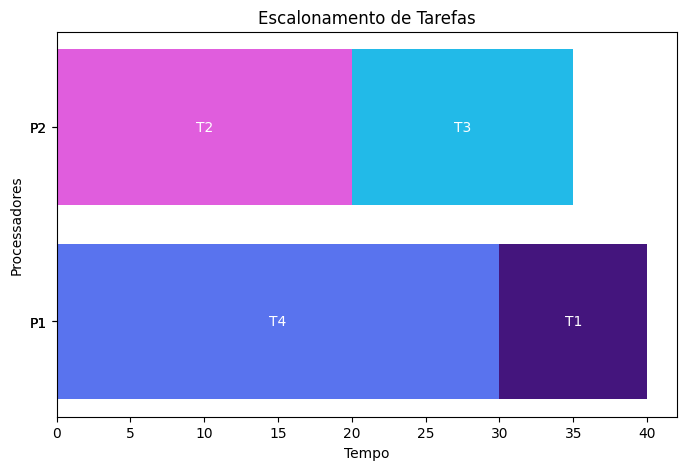

In [10]:

# DESAFIO 4: Escalonamento Inteligente de Tarefas

def escalonar_tarefas(tarefas, processadores):
    fila_processadores = [(0, p["id"]) for p in processadores]  # (tempo disponível, ID do processador)
    heapq.heapify(fila_processadores)
    alocacao = []

    for tarefa in sorted(tarefas, key=lambda t: -t["tempo"]):
        tempo_disponivel, processador = heapq.heappop(fila_processadores)
        inicio = tempo_disponivel
        fim = inicio + tarefa["tempo"]
        alocacao.append((processador, tarefa["id"], inicio, fim))
        heapq.heappush(fila_processadores, (fim, processador))

    makespan = max(alocacao, key=lambda x: x[3])[3]  # Tempo final total
    return alocacao, makespan

def plotar_escalonamento(alocacao):
    fig, ax = plt.subplots(figsize=(8, 5))
    yticks = []
    yticklabels = []

    for i, (proc, tarefa, inicio, fim) in enumerate(alocacao):
        ax.barh(proc, fim - inicio, left=inicio, color=np.random.rand(3,))
        yticks.append(proc)
        yticklabels.append(proc)
        ax.text(inicio + (fim - inicio) / 2, proc, tarefa, ha='center', va='center', color='white')

    ax.set_xlabel("Tempo")
    ax.set_ylabel("Processadores")
    ax.set_title("Escalonamento de Tarefas")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    plt.show()

# Exemplo de entrada
tarefas = [
    {"id": "T1", "tempo": 10},
    {"id": "T2", "tempo": 20},
    {"id": "T3", "tempo": 15},
    {"id": "T4", "tempo": 30}
]
processadores = [
    {"id": "P1"},
    {"id": "P2"}
]

resultado, makespan = escalonar_tarefas(tarefas, processadores)
print("\nDistribuição de tarefas otimizada:")
for r in resultado:
    print(f"- {r[0]} executa {r[1]} ({r[2]}s - {r[3]}s)")
print("Tempo total de execução:", makespan, "s")

plotar_escalonamento(resultado)
